# Using masking with pyscal3

Start with imports

In [1]:
from pyscal3 import System
import matplotlib.pyplot as plt

Read in a sample file. This is an L12 structure with two atom types.

In [2]:
sys = System('l12.dump')

The file has two atom types 1 and 2. We need to find 1-1 distributions, and 2-2 distributions. What this means:

- Consider only atoms of type 1 for calculation
- These atoms should have only neighors of type 1
- repeat for type 2

The key task here is to apply a mask on the atoms, in order to obtain the above conditions. First we select indices of atoms of type 1 and type 2 respectively

In [3]:
indices_type_1 = [count for count, x in enumerate(sys.atoms.types) if x==1]
indices_type_2 = [count for count, x in enumerate(sys.atoms.types) if x==2]

Now we can apply mask. There are two types of masks in pyscal3. The first type, 'primary' means that atoms will not be used for calculations, but they will still appear as neighbors of other atoms in calculations. The next one, 'secondary'map ensures atoms do not appear as neighbors of other atoms. What this means:

- We apply primary mask on atoms of type 2
- We apply secondary mask on atoms of type 2

In short we have to apply both masks on type 2. We can do this with the `all` keyword, shown below:

In [4]:
sys.atoms.apply_mask(mask_type='all', indices=indices_type_2)

Now we can calculate neighbors and calculate q parameters as needed

In [10]:
sys.find.neighbors(method='cutoff', cutoff=1.2)

In [11]:
q_type1 = sys.calculate.steinhardt_parameter([4, 6], averaged=True)

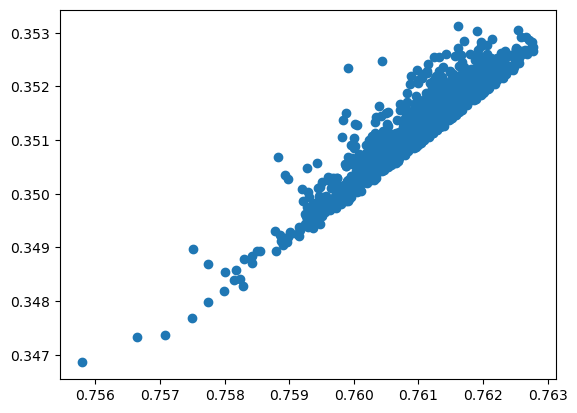

In [12]:
plt.scatter(q_type1[0], q_type1[1])

Now we proceed with distribution for atoms of type 2.We can of course, remove masks, but since we will repeat most of the calcultions anyway, we can also read in the file again,ensuring the calculation is completely new.

In [13]:
sys = System('l12.dump')

In [14]:
indices_type_1 = [count for count, x in enumerate(sys.atoms.types) if x==1]
indices_type_2 = [count for count, x in enumerate(sys.atoms.types) if x==2]

In [15]:
sys.atoms.apply_mask(mask_type='all', indices=indices_type_1)

In [16]:
sys.find.neighbors(method='cutoff', cutoff=1.2)

In [17]:
q_type2 = sys.calculate.steinhardt_parameter([4, 6], averaged=True)

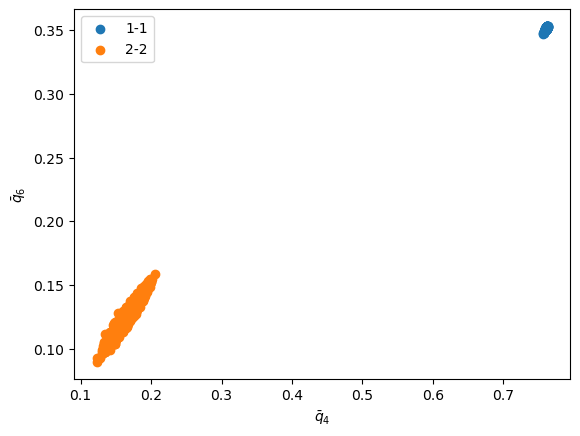

In [20]:
plt.scatter(q_type1[0], q_type1[1], label='1-1')
plt.scatter(q_type2[0], q_type2[1], label='2-2')
plt.xlabel(r'$\bar{q}_4$')
plt.ylabel(r'$\bar{q}_6$')
plt.legend()